In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
!rm csv_results.csv
new = open('csv_results.csv','w')
with open('results.csv') as of:
    while True:
        a = of.readline()
        if not a:
            break
        b = a.replace(' , ', ',')
        new.write(b)
        
of.close()
new.close()

In [3]:
df = pd.read_csv('csv_results.csv')

In [4]:
logs = df.nodes_expanded

In [5]:
a = []
for log in logs:
    a.append(math.log10(log))
node_log = pd.Series(a)


In [6]:
df['node_log10'] = node_log

In [7]:
df[(df['search_name'] == "BFS") & (df['optimal_depth'] == 1)]

,optimal_depth,search_name,solution_depth,nodes_expanded,node_log10
588,1,BFS,1,3,0.477121
602,1,BFS,1,1,0.000000
616,1,BFS,1,1,0.000000
630,1,BFS,1,3,0.477121
644,1,BFS,1,4,0.602060
658,1,BFS,1,1,0.000000
672,1,BFS,1,1,0.000000
686,1,BFS,1,1,0.000000
700,1,BFS,1,2,0.301030
713,1,BFS,1,1,0.000000


In [8]:
avg = df[['optimal_depth','search_name','nodes_expanded']].groupby(['optimal_depth','search_name']).mean()

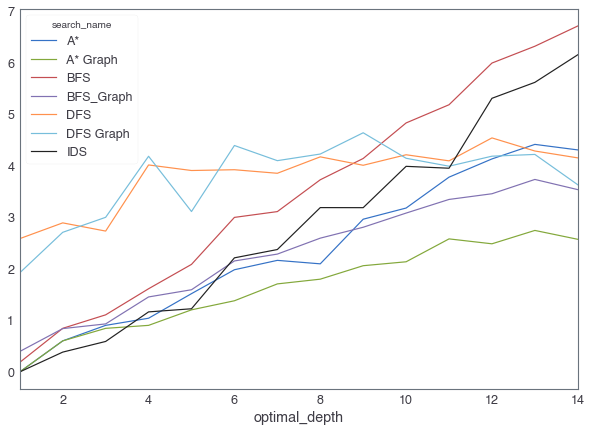

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
df[['optimal_depth','search_name','node_log10']].groupby(['optimal_depth','search_name']).mean()['node_log10'].unstack().plot(ax=ax)
ax.grid(False)

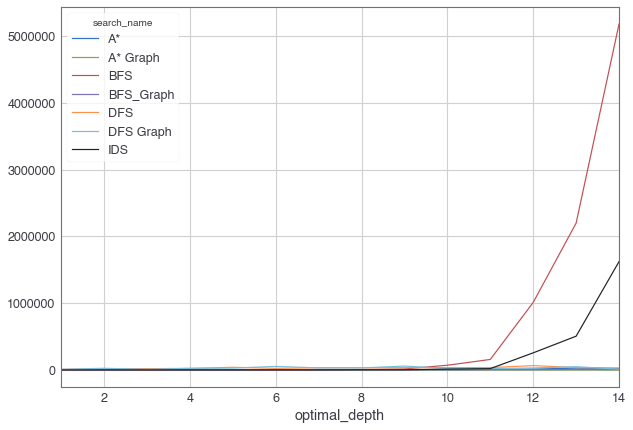

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
df[['optimal_depth','search_name','nodes_expanded']].groupby(['optimal_depth','search_name']).mean()['nodes_expanded'].unstack().plot(ax=ax)

In [11]:
avg

nodes_expanded
optimal_depth search_name                
1             A*                    1.000
              A* Graph              1.000
              BFS                   1.800
              BFS_Graph             2.800
              DFS                8283.300
              DFS Graph          9381.400
              IDS                   1.000
2             A*                    4.000
              A* Graph              4.000
              BFS                   7.300
              BFS_Graph             7.100
              DFS               19227.900
              DFS Graph         24004.200
              IDS                   2.500
3             A*                    8.000
              A* Graph              7.000
              BFS                  12.900
              BFS_Graph             8.600
              DFS               18578.900
              DFS Graph          9777.300
              IDS                   4.000
4             A*                   11.000
              A* Graph              8.000
              BFS                  43.500
              BFS_Graph            29.700
              DFS               23023.900
              DFS Graph         23270.100
              IDS                  16.700
5             A*                   33.000
              A* Graph             16.000
...                                   ...
10            DFS Graph         23427.900
              IDS               11753.700
11            A*                 6011.000
              A* Graph            381.000
              BFS              156598.500
              BFS_Graph          2225.800
              DFS               35006.100
              DFS Graph         20389.300
              IDS               19133.600
12            A*                13565.000
              A* Graph            306.000
              BFS             1010891.200
              BFS_Graph          2876.100
              DFS               64477.300
              DFS Graph         29246.600
              IDS              255681.000
13            A*                25978.000
              A* Graph            556.000
              BFS             2199186.500
              BFS_Graph          5473.200
              DFS               35805.300
              DFS Graph         47149.600
              IDS              504933.000
14            A*                20292.000
              A* Graph            374.000
              BFS             5182280.125
              BFS_Graph          3469.000
              DFS               29159.700
              DFS Graph         11607.200
              IDS             1622898.000

[98 rows x 1 columns]